# Programación Estocástica


### Probabilidades

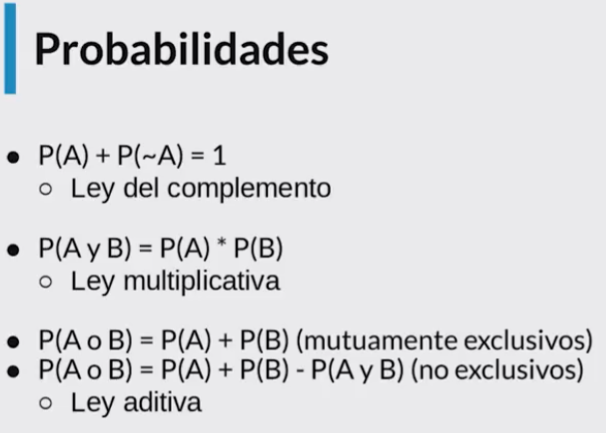

Programas Estocásticos
Introducción a la Programación Estocástica
Un programa es determinístico cuando se corre con un mismo input produce el mismo output. Los programas determinísticos son muy importantes, pero existen problemas que no pueden resolverse de esa manera.

La programación estocástica permite introducir aleatoriedad a nuestros programas para crear simulaciones que permiten resolver otro tipo de problemas. Los programas estocásticos se aprovechan de que las distribuciones probabilísticas de un problema se conocen o pueden ser estimadas.

Cálculo de Probabilidades
La probabilidad es una medida de la certidumbre asociada a un evento o suceso futuro y suele expresarse como un número entre 0 y 1. Una probabilidad de 0 significa que un suceso jamás sucederá, y en su contraparte una probabilidad de 1 significa que está garantizado que sucederá.

Al hablar de probabilidad preguntamos qué fracción de todos los posibles eventos tiene la propiedad que buscamos, por eso es importante poder calcular todas las posibilidades de un evento para entender su probabilidad. La probabilidad de que un evento suceda y de que no suceda es siempre 1.

Ley del complemento:

P(A) + P(~A) = 1
Ley multiplicativa:

P(A y B) = P(A) * P(B)
Ley aditiva:

Mutuamente exclusivos: P(A o B) = P(A) + P(B)

No exclusivos: P(A o B) = P(A) + P(B) - P(A y B)

Para ver un ejemplo práctico de las leyes anteriores vamos a realizar un ejercicio de el lanzamiento de un dado de 6 caras:

La probabilidad de que salga el número 1:

Tenemos 6 posibilidades y el número 1 es una de ellas, por lo que la probabilidad es 1/6.

La probabilidad de que nos toque el numero 1 o 2:

Tenemos 6 posibilidades y el número 1 es una de ellas y el 2 es otra. El que nos toque un número es mutuamente exclusivo, ya que no podemos obtener 2 números al mismo tiempo. Bajo esta premisa utilizaremos la ley aditiva mutuamente exclusiva.

P(1 o 2) = P(1) + P(2) 

P(1 o 2) = 1/6 + 1/6

P(1 o 2) = 2/6

La probabilidad de que nos salga el número 1 al menos 1 vez en 10 lanzamientos:

Para cada lanzamiento tenemos la posibilidad de 1/6 de que nos toque 1, por lo que utilizamos la ley multiplicativa.

(1/6)^10 = 0.8333

### Simulación de Probabilidades: DADOS


La fórmula utilizada para calcular la probabilidad es:

Probabilidad = (Casos Favorables) / (Casos Totales)

In [2]:
import random
# for plotting
from bokeh.plotting import figure, show
# Show plot in notebook, esto me sirve para mostrar la gráfica en el notebook y no abrir el navegador automáticamente.
from bokeh.io import output_notebook
output_notebook()

def tirar_dados(cantidad_de_dados):
    secuencia_de_tiros = []

    for _ in range(cantidad_de_dados):
        tiro = random.choice([1, 2, 3, 4, 5, 6])
        secuencia_de_tiros.append(tiro)

    return secuencia_de_tiros


def intentos(numero_de_intentos, cantidad_de_dados):
        Resultados = [] # Acá vamos a ir guardando los resultados
        for _ in range(numero_de_intentos):
            Resultado_de_tiro_n= tirar_dados(cantidad_de_dados)
            Resultados.append(Resultado_de_tiro_n)
        return Resultados

def probabilidad(n, cantidad_de_dados, numero_de_intentos):
    Resultados = intentos(numero_de_intentos, cantidad_de_dados)
    Probabilidad_de_intento = []    
    resultado_n = 0
    intento_n = 0
    
    for resultado in Resultados:
        intento_n = intento_n + 1
        if n in resultado:
            resultado_n = resultado_n + 1
            # print(resultado_n, resultado)
        probabilidad_de_n = resultado_n / (intento_n)
        Probabilidad_de_intento.append(probabilidad_de_n)   
            
    print(f'Probabilidad de obtener un {n} en {numero_de_intentos} intentos con {cantidad_de_dados} dados = {probabilidad_de_n}')
    # print(f'Probabilidad:{Probabilidad_de_intento}')
    return Probabilidad_de_intento
    
    
# Graficamos
# def plot(numero_de_intentos, probabilidades, cantidad_de_dados):
#     intentos = list(range(1, numero_de_intentos+1, 1))
    
#     plot = figure(title=(f'Probabilidades con {cantidad_de_dados} dados'),
#                     x_axis_label='Tiros',
#                     y_axis_label='Probability')
#     plot.line(intentos, probabilidades)
#     show(plot)
from bokeh.models import Label

if __name__ == '__main__':
    n = int(input('De qué número quiero saber la probabilidad (1-6): ')) # Número o Cantidad de dados
    cantidad_de_dados = int(input('Cuántos dados: ')) # Número o Cantidad de dados
    numero_de_intentos = int(input('Cuantas veces correra la simulacion: '))



    plot = figure(title=(f'Probabilidades Hasta con 5 dados'),
                    x_axis_label='Tiros',
                    y_axis_label='Probability')
        
    prob1 = probabilidad(n , 1, numero_de_intentos)
    prob2 = probabilidad(n , 2, numero_de_intentos)
    prob3 = probabilidad(n , 3, numero_de_intentos)
    prob4 = probabilidad(n , 4, numero_de_intentos)
    prob5 = probabilidad(n , 5, numero_de_intentos)
    
    intentos = list(range(1, numero_de_intentos+1, 1))
    
    from bokeh.palettes import Category10
    colors = Category10[5]  # Colores de la paleta Category10
    
    line5 = plot.line(intentos, prob5, legend_label='5 dados', line_color=colors[4])
    line4 = plot.line(intentos, prob4, legend_label='4 dados', line_color=colors[3])
    line3 = plot.line(intentos, prob3, legend_label='3 dados', line_color=colors[2])
    line2 = plot.line(intentos, prob2, legend_label='2 dados', line_color=colors[1])
    line1 = plot.line(intentos, prob1, legend_label='1 dado',  line_color=colors[0])
    
    plot.legend.title = 'Cantidad de Dados'
    plot.legend.location = 'top_right'
    plot.legend.click_policy = 'hide'
    
    
    
    show(plot)
    

Loading BokehJS ...

Probabilidad de obtener un 6 en 200 intentos con 1 dados = 0.105
Probabilidad de obtener un 6 en 200 intentos con 2 dados = 0.275
Probabilidad de obtener un 6 en 200 intentos con 3 dados = 0.405
Probabilidad de obtener un 6 en 200 intentos con 4 dados = 0.545
Probabilidad de obtener un 6 en 200 intentos con 5 dados = 0.61
